(512, 512)


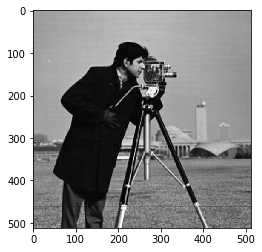

In [27]:
#Author : Vaibhavi Itkyal
#Student ID : s4596970

import matplotlib.pyplot as plt
from skimage import data

image = data.camera()
plt.imshow(image, cmap='gray')
print(image.shape)

In [0]:
import numpy as np
import tensorflow as tf

def sobel_horizontal(image):
  #Kernel weights as a 2D array. 
  kernel_h = np.array([3, 3])
  kernel_h = [[1,2,1], [0,0,0], [-1,-2,-1]]

  input_placeholder = tf.placeholder(dtype=tf.float32, shape=(1, image.shape[0], image.shape[1], 1))
  with tf.name_scope('convolution'):
      conv_h = tf.constant(kernel_h, dtype=tf.float32, shape=(3, 3, 1, 1))
      filtered_h = tf.nn.conv2d(input=input_placeholder, filter=conv_h, strides=[1, 1, 1, 1], padding='SAME')

  with tf.Session() as sess:
      result_h = sess.run(filtered_h, feed_dict={input_placeholder: image[np.newaxis, :, :, np.newaxis]})
      
  return result_h

In [0]:
def sobel_vertical(image):
  #Kernel weights as a 2D array
  kernel_v = np.array([3, 3])
  kernel_v = [[1,0,-1], [2,0,-2], [1,0,-1]]

  input_placeholder = tf.placeholder(dtype=tf.float32, shape=(1, image.shape[0], image.shape[1], 1))
  with tf.name_scope('convolution'):
      conv_v = tf.constant(kernel_v, dtype=tf.float32, shape=(3, 3, 1, 1))    
      filtered_v = tf.nn.conv2d(input=input_placeholder, filter=conv_v, strides=[1, 1, 1, 1], padding='SAME')

  with tf.Session() as sess:
      result_v = sess.run(filtered_v, feed_dict={input_placeholder: image[np.newaxis, :, :, np.newaxis]})

  return result_v

Choose the number corresponding to the image transformation you want
1. Horizontal edges of an image using Sobel Transform
2. Vertical edges of an image using Sobel Transform
3. Edge Magnitiude using Sobel Transform
2


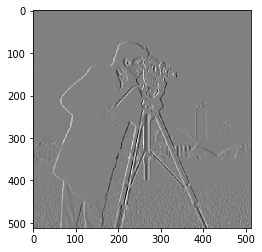

In [30]:
#Visualising edges
tf.reset_default_graph()
display_h = sobel_horizontal(image)
display_v = sobel_vertical(image)
display = ((display_v**2) + (display_h**2))**0.5 #computing edge magnitude 

print('Choose the number corresponding to the image transformation you want')
print('1. Horizontal edges of an image using Sobel Transform\n2. Vertical edges of an image using Sobel Transform\n3. Edge Magnitiude using Sobel Transform')
number = input()

if (number=='1'):
  plt.imshow(display_h[0, :, :, 0], cmap='gray') #Horizontal Edges
elif (number=='2'):
  plt.imshow(display_v[0, :, :, 0], cmap='gray') 
elif (number=='3'):
  plt.imshow(display[0, :, :, 0], cmap='gray') 
else:
  print('Please choose a number from 1,2,3 only.')
  